* * *
<pre> INSEA            <i> Techniques de réduction de dimension - 2025 </i></pre>
* * *


<h1 align="center"> TP 4: PCA and non-linear visualization methods </h1>

<pre align="left"> Lundi 14 Décembre  2025           <i> Author: Hicham Janati </i></pre>
* * *





# Part 1
The following code reads a subset of image data of handwritten digits. The data matrix `X` contains the images: each row is an 8x8 image. The vector `y` contains the true digit for each image. In ML, we call `y` the labels/targets (or “étiquettes” en français).


In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()
X = digits.data
y = digits.target

print(f"La taille des données est {X.shape} et celle des labels est {y.shape}")
print(f"La première image ressemble à:")
plt.figure(figsize=(3, 3))
plt.imshow(X[0].reshape(8, 8), cmap="Greys")
plt.axis("off")
plt.title(f"Le label de cette image est {y[0]}")
plt.show()

### Question 1
Visualize the first 8 images of the dataset in a single figure, with their true label shown as the title for each image.


### Question 2
Prepare the data to perform a principal component analysis and compute the covariance matrix.


### Question 3
Determine the principal axes and their variances, then visualize the 2-dimensional projection using a `plt.scatter`, including the percentage of variance explained by each principal axis. What can you conclude from this?


### Question 4
In the 2D projection figure, color each point according to its true label to see whether PCA made it possible to separate the digits into separate clusters. Check the arguments of `plt.scatter` by running `plt.scatter?`:


In [ ]:
plt.scatter?

### Question 5
Visualize the scree plot (the curve of the cumulative percentage of explained variance as a function of the principal component index, in decreasing order of importance) for this PCA. What do you think about it?


# Part 2: Non-linear methods
MDS, Isomap and TSNE are implemented in scikit-learn's manifold module:

In [ ]:
from sklearn.manifold import Isomap, TSNE, MDS, ClassicalMDS
from sklearn.decomposition import PCA

You can use the following to run MDS for example:

In [ ]:
mds = ClassicalMDS(n_components=2)
X_mds = mds.fit_transform(X)
print(X_mds.shape)

### Question 6:
Compare the PCA projections with classical MDS both visually and computationally. Are they equivalent ?

### Question 7:
Now using MDS (metric) MDS, is the visualization similar ? Compare with PCA and Classical MDS.

### Question 8:
Run isomap and play around with its main arguments (n\_neighbors). Check the [Isomap Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html).

### Question 9:
Run TSNE and play around with `perplexity`. Check the [TSNE documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

### Question 10:
Install umap (`pip install umap-learn`) and run it on the same dataset. The package follows the same API (logic) of scikit-learn with `.fit_transform`

In [ ]:
from umap import UMAP

u = UMAP(n_components=2)

# to do 

# Part 3: SVHN dataset
Now we move on to a more complex dataset: the SVHN (Street view house numbers). You can download it here:

In [18]:
import os, requests
import numpy as np
url = "https://www.dropbox.com/scl/fi/5u0s8hdv7wyzh8rhndi2o/small_svhn.npz?rlkey=l0zsmchiymz8qmdjb16koijqa&dl=1"

local_path = "small_svhn.npz"

if not os.path.exists(local_path):
    print("Downloading small_svhn.npz...")
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_path, "wb") as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)
else:
    print("Using cached small_svhn.npz")

data = np.load(local_path)

X = np.load("small_svhn.npz")["X"]
y = np.load("small_svhn.npz")["y"]

print(f"The shape of the dataset is {X.shape}")
print(f"The first labels are {y[:10]}")

Using cached small_svhn.npz
The shape of the dataset is (3662, 32, 32)
The first labels are [1 1 0 2 6 4 2 5 9 0]


### Question 11: 
Visualize the first images and their labels. What do you notice ?

### Question 12:
Apply PCA, t-SNE and UMAP on this data. Was the result expected ?

# Challenge
Les images SVHN ont une très grande variabilité ce qui rend la séparation des clusters difficile. Le défi est de chercher (une ou des transformations) à appliquer à ces images afin d'extraire des "features" qui simplifient la tâche de t-SNE. Par exemple, on peut jouer sur le contraste, les filtres, la taille des images etc. On note la transformation appliquée à ces images par $\phi$:
$$ \phi: \quad image \in \mathbb R^{32 \times 32} \mapsto \phi(image) \in \mathbb R^{k} $$ 

à vous de définir la transformation $\phi$ adéquate telle que t-SNE appliquée sur $\phi(images)$ distingue au mieux les clusters. Pour définir la transformation $\phi$ vous pouvez utiliser n'importe quelle librairie Python à condition de respecter les règles suivantes:
- $\phi$ ne dépend que des images $X$ et n'utilise pas les labels $y$
- Comprendre exactement ce que fait la fonction $\phi$ 

Pour vous expliquer l'évaluation de votre rendu, on commence avec une fonction $\phi$ naive qui ne fait que reshape chaque image 32 x 32 en un vecteur de taille 1024. On utilise la fonction `transform_images` qui calcule $phi(x_i)$ pour chaque image $x_i$ et renvoie le dataset transformé en dimension $k$:

In [19]:

def phi(image):
    # TODO: define the transformation $\phi$
    return image.flatten()

def transform_images(X):
    out = []
    for image in X:
        phi_x = phi(image)
        out.append(phi_x)
    return np.array(out)



Vous serez évalués sur le temps pris par la transformation également:

In [20]:
from time import time

t0 = time()
X_transformed = transform_images(X)
t1 = time()

print(f"Temps pris pour la transformation du dataset: {t1 - t0}s | Nouvelle dimension des données: {X_transformed.shape}")


Temps pris pour la transformation du dataset: 0.022612810134887695s | Nouvelle dimension des données: (3662, 1024)


On applique t_SNE sur ces données transformées. Afin de garder la reproducibilité du code et de pouvoir comparer avec les autres soumissions de façon équitable, ne changez pas le `random_state=42`:

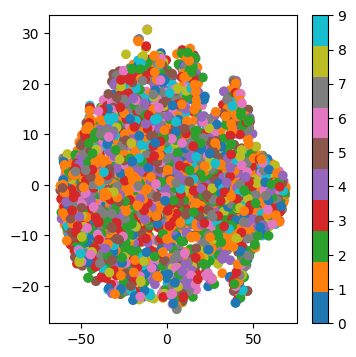

In [21]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_transformed)

plt.figure(figsize=(4, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="tab10")
plt.colorbar()
plt.show()

Pour évaluer la qualité des clusters, on évalue simplement la performance d'un k-NN sur la représentation t-SNE. En pratique, on ne fait jamais ça, ceci est un simple critère mesurable afin de comparer vos méthodes. Éxécutez mais Ne changez pas le code suivant:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
print(f"Score du k-NN: {score}")

Score du k-NN: 0.29740791268758526
